In [ ]:
!pip install contractions

In [ ]:
!pip install gensim

In [ ]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import unicodedata
import contractions
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

suicidal_reddit = pd.read_csv('si_reddit.csv')
suicidal_twitter = pd.read_csv('sitwitter.csv')
suicidal_twitter2 = pd.read_csv('si_twitter2.csv')

In [ ]:
suicidal_twitter2 = suicidal_twitter2.rename(columns={'tweet': 'Tweet', 'intention': 'Suicide'})

In [ ]:
label_encoder = LabelEncoder()
suicidal_twitter['Suicide'] = label_encoder.fit_transform(suicidal_twitter['Suicide'])
suicidal_twitter2['Suicide'] = label_encoder.fit_transform(suicidal_twitter2['Suicide'])
suicidal_twitter2

,Tweet,Suicide
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1
...,...,...
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1


In [ ]:
suicidal_twitter2.isna().sum()

Tweet      0
Suicide    0
dtype: int64

In [ ]:
suicidal_twitter = pd.concat([suicidal_twitter, suicidal_twitter2], axis=0)

In [ ]:
suicidal_reddit

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [ ]:
suicidal_reddit['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [ ]:
suicidal_twitter['Suicide'].value_counts()

Suicide
0    6248
1    4658
Name: count, dtype: int64

In [ ]:
value_counts_suicidal_reddit = pd.DataFrame(suicidal_reddit['class'].value_counts())
value_counts_suicidal_reddit = value_counts_suicidal_reddit.reset_index()
value_counts_suicidal_reddit.columns = ['class', 'count']
print(value_counts_suicidal_reddit)

         class   count
0      suicide  116037
1  non-suicide  116037


Text(0.5, 1.0, 'Class distribution of target Suicidal class for Reddit Data')

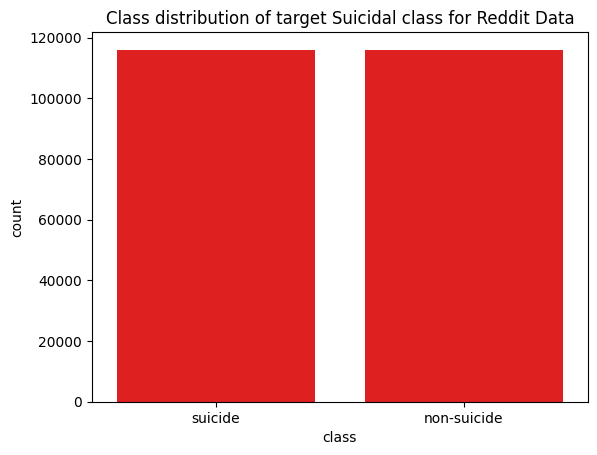

In [ ]:
sns.barplot(data=value_counts_suicidal_reddit, x='class', y='count', color='red')
plt.title('Class distribution of target Suicidal class for Reddit Data')

In [ ]:
value_counts_suicidal_twitter = pd.DataFrame(suicidal_twitter['Suicide'].value_counts())
value_counts_suicidal_twitter = value_counts_suicidal_twitter.reset_index()
value_counts_suicidal_twitter.columns = ['class', 'count']
print(value_counts_suicidal_twitter)

   class  count
0      0   6248
1      1   4658


Text(0, 0.5, 'Count')

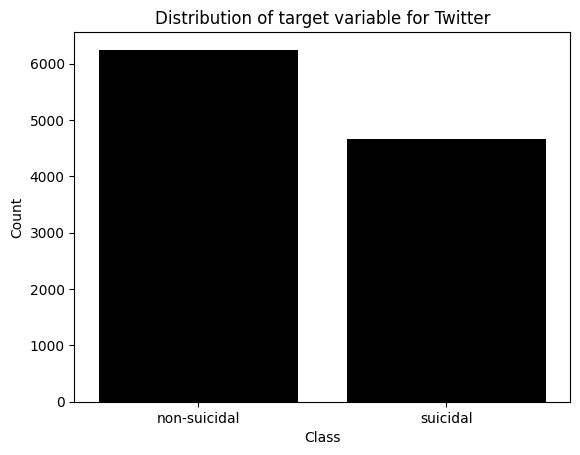

In [ ]:
sns.barplot(value_counts_suicidal_twitter, x='class', y='count',color='k')
plt.title('Distribution of target variable for Twitter')
plt.xticks([0, 1], ['non-suicidal', 'suicidal'])
plt.xlabel('Class')
plt.ylabel('Count')

Data Pre-processing
1. Turning text into lower case - .lower() (done)
2. Removing emails ("([\w\.\-\_]+@[\w\.\-\_]+)") (done)
3. Removing html_tags ('<.*?') (done)
4. Removing special characters ('[^a-zA-z0-9.,!?/:;\"\'\s]') (done)
5. Remove extra white spaces  ('\s+')
6. Remove non-ASCII characters due to accent characters (done)
7. Remove website links and image URL ('http\S+|www\S+|https\S+') (done)
8. Removing @username and hashtags ('\@\w+|\#') #for Twitter (done)
9. Remove punctuation ('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') (done)
10. Expand contractions to convert eg: i'll  to I will. (done)
11. Removing mentions and hashtags ('@\S*') (done)
12. Removing digits ('[^a-zA-z.,!?/:;\"\'\s]') (done)
13. Removing \n ('\n') (done)
13. Lemmatization
14. Stemming

Sources: https://gauravtanwar1.medium.com/nlp-a-comprehensive-guide-to-text-cleaning-and-preprocessing-63f364febfc5

In [ ]:
suicidal_reddit.isna().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

In [ ]:
suicidal_twitter.isna().sum()

Tweet      2
Suicide    0
dtype: int64

In [ ]:
suicidal_twitter['Tweet'].dropna(how='any', inplace=True)

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].astype(str)

In [ ]:
#turning text into lower case
def to_lowercase(textfile):
    return textfile.lower()

In [ ]:
samplerowwithuppercase = suicidal_reddit.iloc[8]['text']
samplerowwithuppercase

'Everyone wants to be "edgy" and it\'s making me self conscious I feel like I don\'t stand out. I can draw yes and play the guitar but I honestly feel like am stuck in the past, my taste in music are all rock and alt metal from\n2000\'s to the 90\'s and it doesn\'t really make me feel unique it\'s just my style but seeing as my friends and classmates getting more into rap and EDM it\'s hard for me to feel like I fit in.\nThe I don\'t feel like I stand out is because of all the others copying a style and if I do that I\'d be just another\n"Quirky kid" who\'s in a cringey phase.\nMany of my friends say that I look good in grunge style and I kinda agree but it\'s hard for me to continue that if I can\'t even stand out from all the "edgy\nPeople who wore crosses and wallet chains and do tiktoks"\n\nReally feels like I don\'t fit in in all categories, am scared that people might confuse me with a CLOUT CHASER or a fucking tiktok e boy goddamn\nI hate my life'

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(to_lowercase)

In [ ]:
samplerowwithuppercase = suicidal_reddit.iloc[8]['text']
samplerowwithuppercase

'everyone wants to be "edgy" and it\'s making me self conscious i feel like i don\'t stand out. i can draw yes and play the guitar but i honestly feel like am stuck in the past, my taste in music are all rock and alt metal from\n2000\'s to the 90\'s and it doesn\'t really make me feel unique it\'s just my style but seeing as my friends and classmates getting more into rap and edm it\'s hard for me to feel like i fit in.\nthe i don\'t feel like i stand out is because of all the others copying a style and if i do that i\'d be just another\n"quirky kid" who\'s in a cringey phase.\nmany of my friends say that i look good in grunge style and i kinda agree but it\'s hard for me to continue that if i can\'t even stand out from all the "edgy\npeople who wore crosses and wallet chains and do tiktoks"\n\nreally feels like i don\'t fit in in all categories, am scared that people might confuse me with a clout chaser or a fucking tiktok e boy goddamn\ni hate my life'

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(to_lowercase)

In [ ]:
#remove non-ASCII characters due to accent characters
def standardize_accented_chars(textfile):
 return unicodedata.normalize('NFKD', textfile).encode('ascii', 'ignore').decode('utf-8', 'ignore')


In [ ]:
rowwithstandardize_accented_chars = suicidal_twitter.iloc[1762]['Tweet']
rowwithstandardize_accented_chars

'i hate going into my rap zone cause then i think to myself damn people should really hear this but then i go oh welâ\x80¦ https://t.co/qu72v284yt'

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(standardize_accented_chars)

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(standardize_accented_chars)

In [ ]:
rowwithstandardize_accented_chars = suicidal_twitter.iloc[1762]['Tweet']
rowwithstandardize_accented_chars

'i hate going into my rap zone cause then i think to myself damn people should really hear this but then i go oh wela https://t.co/qu72v284yt'

In [ ]:
#removing digits
def remove_digits(textfile):
    return re.sub(r'[^a-zA-z.,!?/:;\"\'\s]','', textfile)

In [ ]:
samplerowwithdigits = suicidal_twitter.iloc[49]['Tweet']
samplerowwithdigits

'@meerajane i luv your blog too! fashion is &lt;3'

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_digits)

In [ ]:
samplerowwithdigits = suicidal_twitter.iloc[49]['Tweet']
samplerowwithdigits

'meerajane i luv your blog too! fashion is lt;'

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_digits)

In [ ]:
#remove html links
def remove_url(textfile):
    return re.sub(r'http\S+|www\S+|https\S+','', textfile)

In [ ]:
samplerowwithurl = suicidal_reddit.iloc[109]['text']
samplerowwithurl

'check out this new horror short i made https://youtu.be/smcngmws it took me a while to make so hope you enjoy it'

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_url)

In [ ]:
samplerowwithurl = suicidal_reddit.iloc[109]['text']
samplerowwithurl

'check out this new horror short i made  it took me a while to make so hope you enjoy it'

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_url)

In [ ]:
def clean_twitter_url(text):
    text= re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

In [ ]:
def remove_emails(textfile):
    return re.sub("([\w\.\-\_]+@[\w\.\-\_]+)", '', textfile)

In [ ]:
sampleemail = suicidal_reddit.iloc[2764]['text']
sampleemail

'seeking a pen pal to navigate the stormsi am sure many can relate with me; i am really struggling with being honest to those closet to me about just how low i am. i am looking for some escapism and a friend. i want to be a friend to you and carry each other through the storms. because the sun always comes out again. maybe not today but someday soon. take care poppets. it may get choppy. \nonegingernutjobgmail.com'

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_emails)

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_emails)

In [ ]:
sampleemail = suicidal_reddit.iloc[2764]['text']
sampleemail

'seeking a pen pal to navigate the stormsi am sure many can relate with me; i am really struggling with being honest to those closet to me about just how low i am. i am looking for some escapism and a friend. i want to be a friend to you and carry each other through the storms. because the sun always comes out again. maybe not today but someday soon. take care poppets. it may get choppy. \nonegingernutjobgmail.com'

In [ ]:
#remove html tags
from bs4 import BeautifulSoup

def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_html_tags)

<ipython-input-74-8a24b11e90a7>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_html_tags)

<ipython-input-74-8a24b11e90a7>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
#remove special characters
def remove_special_characters(textfile):
   return re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', textfile)


In [ ]:
specialcharacters = suicidal_reddit.iloc[2773]['text']
specialcharacters

"what do i do?so i was gonna do it tonight even though it probably won't work and i'll just end up in inpatient again. but i'm supposed to be going and seeing my nan this weekend and i know if i try to do anything i'll just be yelled at because 'i didn't want to see my nan' or that 'im selfish' or 'i ruined her weekend' when i really just want to kill myself lol. should i just go for it?"

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_special_characters)

In [ ]:
specialcharacters = suicidal_reddit.iloc[2939]['text']
specialcharacters

"it's not enough to just be fat and lonely, but now i have to be diagnosed with oral cancer. fuck.while all of my close friends are comfy with their girlfriends and fiancees, i'm just sitting here kicking it until i die. i don't necessarily want to die, but the fact that i just got diagnosed with cancer really doesn't help.\n\nnothing turned out the way i wanted it to. i was supposed to graduate college, get a good job and have some girl fall in love with me. instead, i dropped out because of crippling depression after my grandfather my father figure died, got scrap jobs for the last five years and now....well, now...i have fucking cancer.\n\nif there is a god, this is him giving me the stone cold stunner. i'm down for the count. if i do survive, my life won't even be worth it. instead, i'd love to just try and start again. it doesn't happen this way, but fuck. it makes me sick that some of the people i know that don't deserve shit are taking trips to fucking cabo three times a year an

In [ ]:
#Expand contractions
def expand_contractions(textfile):
    expanded_words = []
    for word in textfile.split():
       expanded_words.append(contractions.fix(word))
    return ' '.join(expanded_words)


In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(expand_contractions)


In [ ]:
specialcharacters = suicidal_reddit.iloc[2939]['text']
specialcharacters

'it is not enough to just be fat and lonely, but now i have to be diagnosed with oral cancer. fuck.while all of my close friends are comfy with their girlfriends and fiancees, i am just sitting here kicking it until i die. i do not necessarily want to die, but the fact that i just got diagnosed with cancer really does not help. nothing turned out the way i wanted it to. i was supposed to graduate college, get a good job and have some girl fall in love with me. instead, i dropped out because of crippling depression after my grandfather my father figure died, got scrap jobs for the last five years and now....well, now...i have fucking cancer. if there is a god, this is him giving me the stone cold stunner. i am down for the count. if i do survive, my life will not even be worth it. instead, i would love to just try and start again. it does not happen this way, but fuck. it makes me sick that some of the people i know that do not deserve shit are taking trips to fucking cabo three times a

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(expand_contractions)

In [ ]:
punctations = suicidal_reddit.iloc[2773]['text']
punctations

"what do i do?so i was going to do it tonight even though it probably will not work and i will just end up in inpatient again. but i am supposed to be going and seeing my nan this weekend and i know if i try to do anything i will just be yelled at because 'i did not want to see my nan' or that 'i am selfish' or 'i ruined her weekend' when i really just want to kill myself lol. should i just go for it?"

In [ ]:
def remove_punctuations(textfile):
    return re.sub(r"[!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n -' ]"," ", textfile)

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_punctuations)


In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_punctuations)

In [ ]:
punctations = suicidal_reddit.iloc[2773]['text']
punctations

'what do i do so i was going to do it tonight even though it probably will not work and i will just end up in inpatient again  but i am supposed to be going and seeing my nan this weekend and i know if i try to do anything i will just be yelled at because  i did not want to see my nan  or that  i am selfish  or  i ruined her weekend  when i really just want to kill myself lol  should i just go for it '

In [ ]:
def remove_newlines(textfile):
    return re.sub(r'\n', ' ', textfile)

In [ ]:
#remove newlines
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_newlines)

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_newlines)

In [ ]:
newlines = suicidal_reddit.iloc[2939]['text']
newlines

'it is not enough to just be fat and lonely  but now i have to be diagnosed with oral cancer  fuck while all of my close friends are comfy with their girlfriends and fiancees  i am just sitting here kicking it until i die  i do not necessarily want to die  but the fact that i just got diagnosed with cancer really does not help  nothing turned out the way i wanted it to  i was supposed to graduate college  get a good job and have some girl fall in love with me  instead  i dropped out because of crippling depression after my grandfather my father figure died  got scrap jobs for the last five years and now    well  now   i have fucking cancer  if there is a god  this is him giving me the stone cold stunner  i am down for the count  if i do survive  my life will not even be worth it  instead  i would love to just try and start again  it does not happen this way  but fuck  it makes me sick that some of the people i know that do not deserve shit are taking trips to fucking cabo three times a

In [ ]:
def remove_username_tags(textfile):
    return re.sub(r'@\S*', '', textfile)

In [ ]:
tags = suicidal_twitter.iloc[40]['Tweet']
tags

'heavenlyhev how was it  so i know what to expect '

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_username_tags)
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_username_tags)

In [ ]:
def remove_space(textfile):
    return re.sub(r'\s+',' ', textfile)

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(remove_space)
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(remove_space)

In [ ]:
suicidal_reddit['text']

0         ex wife threatening suiciderecently i left my ...
1         am i weird i do not get affected by compliment...
2         finally is almost over so i can never hear has...
3               i need helpjust help me i am crying so hard
4         i am so losthello my name is adam and i have b...
                                ...                        
232069    if you do not like rock then your not going to...
232070    you how you can tell i have so many friends an...
232071    pee probably tastes like salty tea can someone...
232072    the usual stuff you find herei m not posting t...
232073    i still have not beaten the first boss in holl...
Name: text, Length: 232074, dtype: object

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:

stop_words = set(stopwords.words('english'))

ps = PorterStemmer()

def token_stem(text_file):
    words = word_tokenize(text_file)
    stemmed_words = [ps.stem(word) for word in words if word.lower() not in stop_words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text


In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(token_stem)

In [ ]:
suicidal_reddit['text'] = suicidal_reddit['text'].apply(token_stem)


In [ ]:
suicidal_reddit.to_csv('reddit_cleaned_stemmed.csv')

In [ ]:
suicidal_twitter['Tweet'] = suicidal_twitter['Tweet'].apply(token_stem)

In [ ]:
suicidal_twitter.to_csv('twitter_cleaned_stemmed.csv')

In [ ]:
suicidal_reddit

,Unnamed: 0,text,class
0,2,ex wife threaten suiciderec left wife good che...,suicide
1,3,weird get affect compliment come someon know i...,non-suicide
2,4,final almost never hear bad year ever swear fu...,non-suicide
3,8,need helpjust help cri hard,suicide
4,9,losthello name adam struggl year afraid past y...,suicide
...,...,...,...
232069,348103,like rock go get anyth go,non-suicide
232070,348106,tell mani friend lone everyth depriv prebought...,non-suicide
232071,348107,pee probabl tast like salti tea someon drank p...,non-suicide
232072,348108,usual stuff find herei post sympathi piti know...,suicide


#EDA
1. Word Cloud
2. Text Statistics
3. Frequency Analysis
4. Part-of-Speech Tagging
5. Word Embeddings

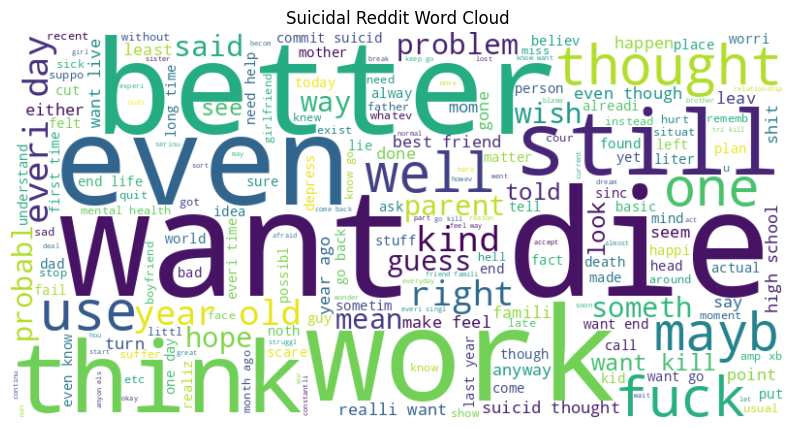

In [ ]:


suicide_text = suicidal_reddit[suicidal_reddit['class'] == 'suicide']['text']
reddit_text_data = ' '.join(suicide_text.astype(str))

reddit_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reddit_text_data)
plt.figure(figsize=(10, 6))
plt.imshow(reddit_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Suicidal Reddit Word Cloud')
plt.show()


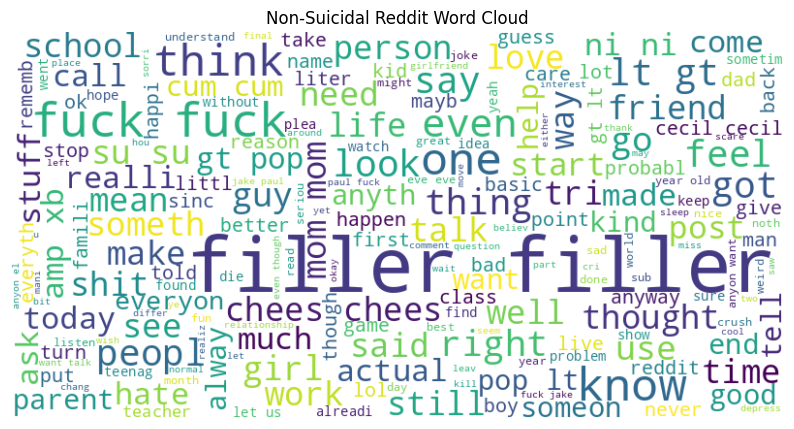

In [ ]:
non_suicide_text = suicidal_reddit[suicidal_reddit['class'] == 'non-suicide']['text']
non_suicide_reddit_text_data = ' '.join(non_suicide_text.astype(str))

non_suicide_reddit_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_suicide_reddit_text_data)
plt.figure(figsize=(10, 6))
plt.imshow(non_suicide_reddit_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Suicidal Reddit Word Cloud')
plt.show()

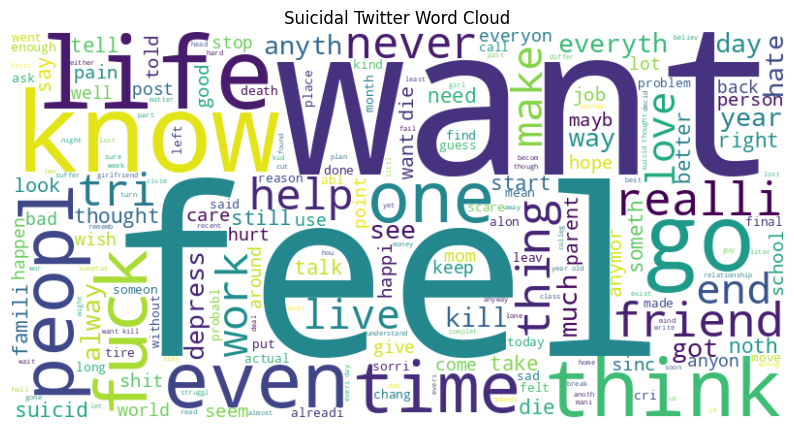

In [ ]:
twitter_suicide_text = suicidal_twitter[suicidal_twitter['Suicide'] == 1]['Tweet']
twittersuicide_text_data = ' '.join(twitter_suicide_text.astype(str))

twittersuicide_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(twittersuicide_text_data)
plt.figure(figsize=(10, 6))
plt.imshow(twittersuicide_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Suicidal Twitter Word Cloud')
plt.show()

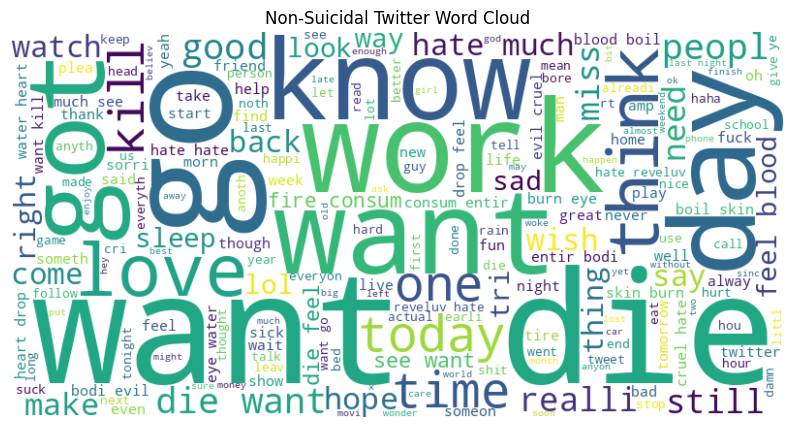

In [ ]:
non_twitter_suicide_text = suicidal_twitter[suicidal_twitter['Suicide'] == 0]['Tweet']
nontwittersuicide_text_data = ' '.join(non_twitter_suicide_text.astype(str))

nontwittersuicide_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nontwittersuicide_text_data)
plt.figure(figsize=(10, 6))
plt.imshow(nontwittersuicide_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Suicidal Twitter Word Cloud')
plt.show()

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
suicidal_reddit

,Unnamed: 0,text,class
0,2,ex wife threaten suiciderec left wife good che...,suicide
1,3,weird get affect compliment come someon know i...,non-suicide
2,4,final almost never hear bad year ever swear fu...,non-suicide
3,8,need helpjust help cri hard,suicide
4,9,losthello name adam struggl year afraid past y...,suicide
...,...,...,...
232069,348103,like rock go get anyth go,non-suicide
232070,348106,tell mani friend lone everyth depriv prebought...,non-suicide
232071,348107,pee probabl tast like salti tea someon drank p...,non-suicide
232072,348108,usual stuff find herei post sympathi piti know...,suicide


In [ ]:
suicidal_reddit_text = suicidal_reddit.loc[suicidal_reddit['class'] == 'suicide', 'text']
suicidal_twitter_text = suicidal_twitter.loc[suicidal_twitter['Suicide'] == 1, 'Tweet']

<Axes: >

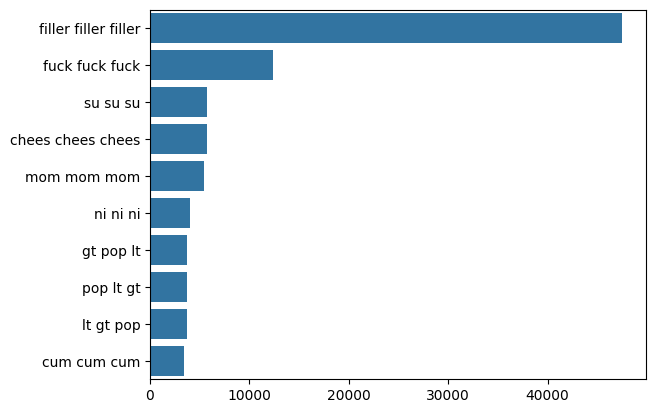

In [ ]:
top_bi_grams=get_top_ngram(suicidal_reddit_text,n=2)


<Axes: >

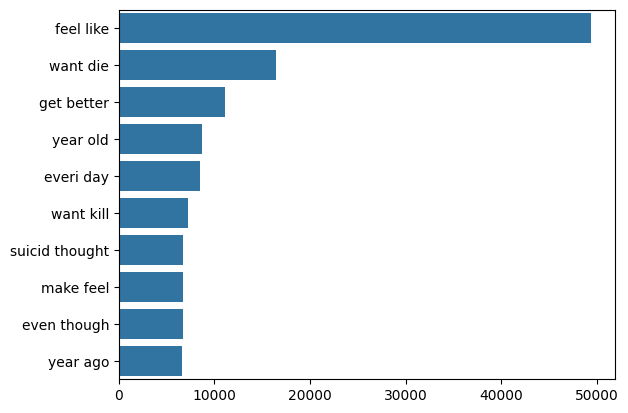

In [ ]:
x,y=map(list,zip(*top_bi_grams))
sns.barplot(x=y,y=x)

<Axes: >

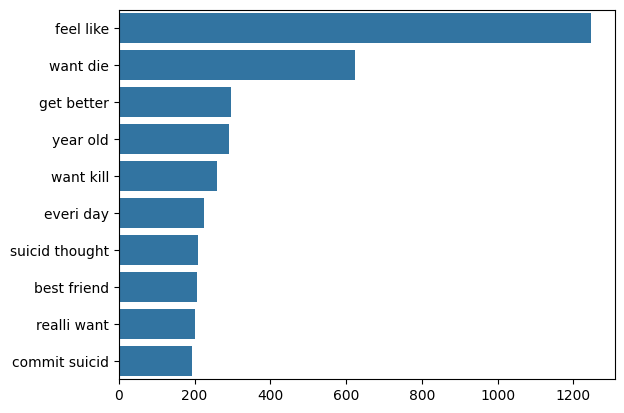

In [ ]:
twitter_top_bi_grams=get_top_ngram(suicidal_twitter_text,n=2)
a,b=map(list,zip(*twitter_top_bi_grams))
sns.barplot(x=b,y=a)

In [ ]:
reddit_corpus = suicidal_reddit.loc[suicidal_reddit['class'] == 'suicide', 'text']
reddit_corpus_tokenized = [gensim.utils.simple_preprocess(doc) for doc in reddit_corpus]
reddit_suicidal_dic = gensim.corpora.Dictionary(reddit_corpus_tokenized)
reddit_suicidal_bow_corpus = [reddit_suicidal_dic.doc2bow(doc) for doc in reddit_corpus_tokenized]
reddit_lda_model = gensim.models.LdaMulticore(reddit_suicidal_bow_corpus,
                                               num_topics=4,
                                               id2word=reddit_suicidal_dic,
                                               passes=2,
                                               workers=2)


for idx, topic in reddit_lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.012*"get" + 0.012*"go" + 0.011*"year" + 0.010*"would" + 0.009*"work" + 0.008*"time" + 0.008*"job" + 0.007*"got" + 0.007*"day" + 0.007*"want"

Topic: 1 
Words: 0.026*"want" + 0.022*"know" + 0.019*"feel" + 0.016*"go" + 0.014*"like" + 0.013*"would" + 0.013*"think" + 0.012*"get" + 0.012*"help" + 0.011*"suicid"

Topic: 2 
Words: 0.025*"want" + 0.023*"life" + 0.021*"feel" + 0.018*"like" + 0.016*"fuck" + 0.013*"get" + 0.013*"peopl" + 0.013*"live" + 0.012*"go" + 0.012*"know"

Topic: 3 
Words: 0.015*"like" + 0.014*"friend" + 0.014*"feel" + 0.010*"year" + 0.010*"time" + 0.010*"know" + 0.008*"get" + 0.008*"would" + 0.008*"realli" + 0.008*"peopl"



In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(reddit_lda_model, reddit_suicidal_bow_corpus, reddit_suicidal_dic)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.059402  0.040879       1        1  29.801059
3      0.038295  0.038900       2        1  24.474483
0      0.072133 -0.025432       3        1  23.882517
1     -0.051027 -0.054346       4        1  21.841941, topic_info=     Term           Freq          Total Category  logprob  loglift
45   want  168225.000000  168225.000000  Default  30.0000  30.0000
435  fuck   62493.000000   62493.000000  Default  29.0000  29.0000
12   feel  150403.000000  150403.000000  Default  28.0000  28.0000
23   know  120956.000000  120956.000000  Default  27.0000  27.0000
115  life  113392.000000  113392.000000  Default  26.0000  26.0000
..    ...            ...            ...      ...      ...      ...
283   say   11968.370897   38495.100417   Topic4  -5.2435   0.3531
46    way   12291.753912   42367.865518   Topic4  -5.2168   0.2839
89   even   13488.607990   78045.356796   Topic4  -5.1239  -0.2341
167  take   11763.627391   37191.769827   Topic4  -5.2608   0.3703
29   much   12069.179923   50781.754700   Topic4  -5.2351   0.0845

[428 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
8706       3  0.029795  acetaminophen
8706       4  0.968323  acetaminophen
7343       2  0.009110          advil
7343       3  0.027329          advil
7343       4  0.965628          advil
...      ...       ...            ...
181        2  0.341907           year
181        3  0.350754           year
181        4  0.077311           year
8676       4  0.968582     yesterdayi
21706      4  0.970479       zopiclon

[1047 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [ ]:
twitter_corpus = suicidal_twitter.loc[suicidal_twitter['Suicide'] == 1, 'Tweet']
twitter_corpus_tokenized = [gensim.utils.simple_preprocess(doc) for doc in twitter_corpus]
twitter_suicidal_dic = gensim.corpora.Dictionary(twitter_corpus_tokenized)
twitter_suicidal_bow_corpus = [twitter_suicidal_dic.doc2bow(doc) for doc in twitter_corpus_tokenized]
twitter_lda_model = gensim.models.LdaMulticore(twitter_suicidal_bow_corpus,
                                               num_topics=4,
                                               id2word=twitter_suicidal_dic,
                                               passes=2,
                                               workers=2)


for idx, topic in twitter_lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 
Words: 0.020*"want" + 0.017*"feel" + 0.015*"like" + 0.013*"know" + 0.012*"get" + 0.012*"life" + 0.010*"think" + 0.009*"go" + 0.009*"realli" + 0.008*"kill"

Topic: 1 
Words: 0.022*"feel" + 0.021*"want" + 0.014*"like" + 0.012*"know" + 0.011*"go" + 0.011*"life" + 0.009*"fuck" + 0.009*"get" + 0.009*"would" + 0.008*"even"

Topic: 2 
Words: 0.012*"go" + 0.009*"know" + 0.008*"get" + 0.008*"like" + 0.008*"want" + 0.007*"tri" + 0.007*"time" + 0.007*"hate" + 0.007*"help" + 0.006*"day"

Topic: 3 
Words: 0.021*"want" + 0.010*"die" + 0.010*"year" + 0.010*"go" + 0.009*"know" + 0.009*"get" + 0.009*"time" + 0.009*"friend" + 0.008*"life" + 0.008*"like"



In [ ]:
pyLDAvis.enable_notebook()
twitter_vis = gensimvis.prepare(twitter_lda_model, twitter_suicidal_bow_corpus, twitter_suicidal_dic)
twitter_vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.002336  0.024317       1        1  34.116040
0      0.025362 -0.001622       2        1  33.109652
1      0.018446 -0.016456       3        1  28.605844
2     -0.046144 -0.006239       4        1   4.168465, topic_info=       Term         Freq        Total Category  logprob  loglift
4        go  2897.000000  2897.000000  Default  30.0000  30.0000
23     hate  1002.000000  1002.000000  Default  29.0000  29.0000
59     fuck  1377.000000  1377.000000  Default  28.0000  28.0000
136    know  3266.000000  3266.000000  Default  27.0000  27.0000
86     feel  4086.000000  4086.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
61     love    46.345700  1330.486212   Topic4  -5.5613  -0.1795
91   realli    49.019658  1827.301879   Topic4  -5.5052  -0.4408
21      die    50.766544  2223.366867   Topic4  -5.4702  -0.6019
144     one    47.194759  2042.401673   Topic4  -5.5431  -0.5900
60     kill    46.520521  1864.074551   Topic4  -5.5575  -0.5130

[382 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
14549      1  0.847782  aaahhh
2459       1  0.114811  accord
2459       2  0.229621  accord
2459       3  0.114811  accord
2459       4  0.459243  accord
...      ...       ...     ...
465        1  0.541258    year
465        2  0.208422    year
465        3  0.213738    year
465        4  0.036686    year
14500      2  0.902597    yelp

[728 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

#Feature Selection
1. TFIDF
2. Word Embedding
3. Bag of Words
4. N-grams
5. Latent Semantic Indexing